<h3>Objective</h3>
<h4>The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store (each row of data).

So the idea is to find out the features (properties) of a product, and store which impacts the sales of a product.</h4>

<h2>Load The Dataset</h2>

In [ ]:
import pandas as pd
df = pd.read_csv(r"C:\Users\vishw\Downloads\sales_prediction.csv")

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<h2>Preparing training and testing dataset</h2>
<h3>Need Data to train model, and need unseen data to measure model performance use: </h3>
<h3>
70% data for Train 30% data for Test seed = 42 for reproducibility 
Always split data right at the start if not having seperate datasets
</h3>

In [ ]:
x = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

SEED = 42

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=SEED)

x_train.shape,x_test.shape

((5966, 11), (2557, 11))

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
x_train['Item_Weight'] = imputer.fit_transform(x_train[['Item_Weight']])
x_test['Item_Weight'] = imputer.transform(x_test[['Item_Weight']])


In [ ]:
x_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,Small,Tier 3,Grocery Store
655,NCJ42,19.75,Non_Edible,0.014301,Non_Consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,8.60,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
y_train.head(3)

1921     117.8466
655     1230.3984
2229    4933.5780
Name: Item_Outlet_Sales, dtype: float64

<h2>Data Wrangling + EDA + Feature Engineerin</h2>

<h3>Basic EDA</h3>

In [ ]:
#make a copy to do exploration \ modification 
x_train_c = x_train.copy()

In [ ]:
x_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [ ]:
x_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<h4>Numeric Features</h4>

In [ ]:
num_data = x_train_c.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,8.60,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [ ]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5966.000000,5966.000000,5966.000000,5966.000000
mean,12.970155,0.065821,141.814242,1997.867248
std,4.617494,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.930000,0.026982,94.144250,1987.000000
50%,12.800000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [ ]:
num_data.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

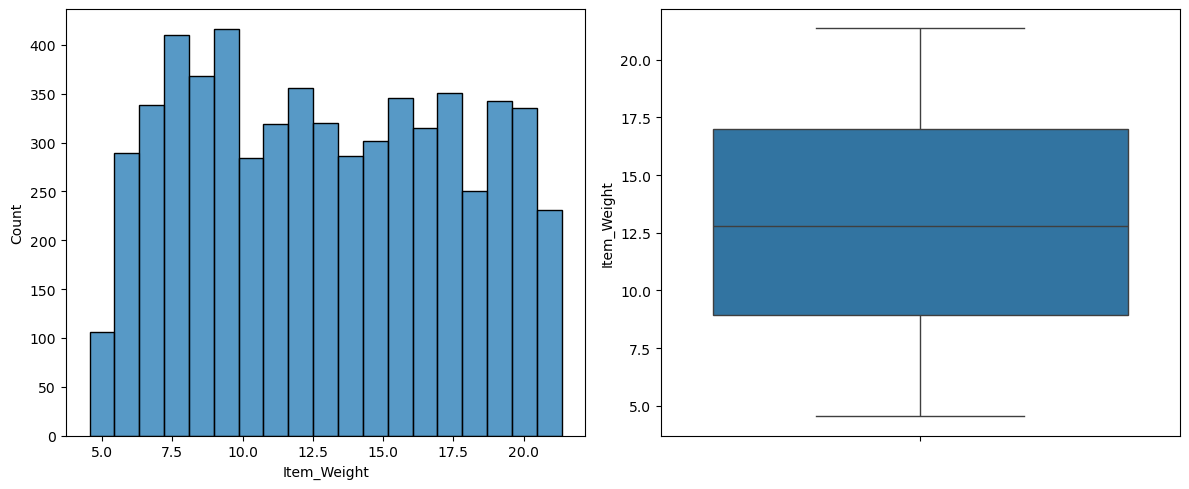

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=x_train_c, x='Item_Weight', ax=ax[0])
sns.boxplot(data=x_train_c, y='Item_Weight', ax=ax[1])

plt.tight_layout()
plt.show()


In [ ]:
def visualize_numeric_features(data_frame, col_name):
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    sns.histplot(data=data_frame, x=col_name, ax=ax[0])
    sns.boxplot(data=data_frame, y=col_name, ax=ax[1])

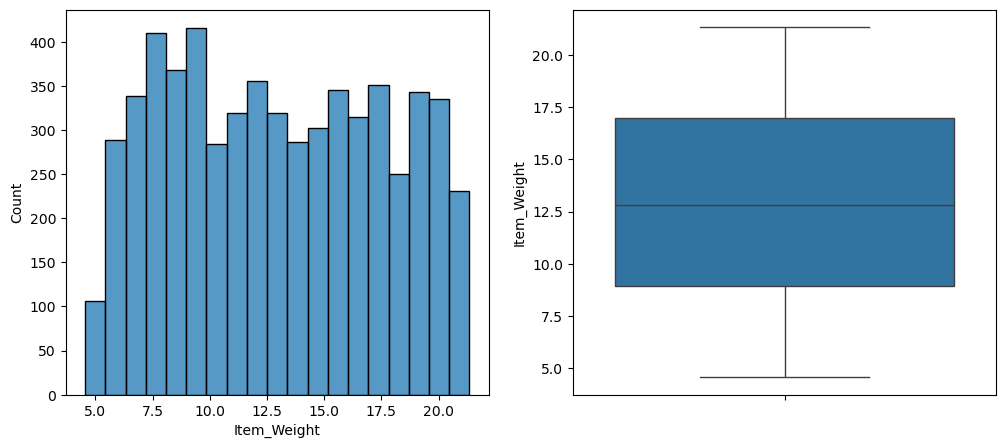

In [ ]:
visualize_numeric_features(x_train_c,'Item_Weight')

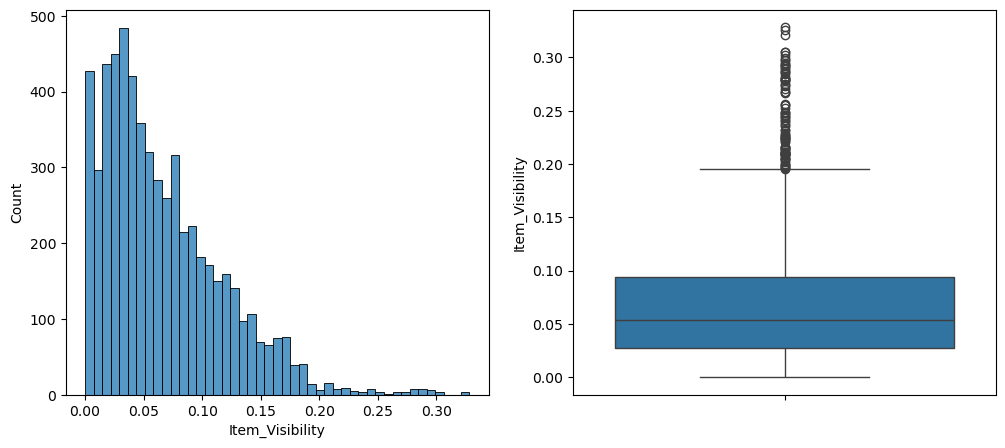

In [ ]:
visualize_numeric_features(x_train_c,'Item_Visibility')

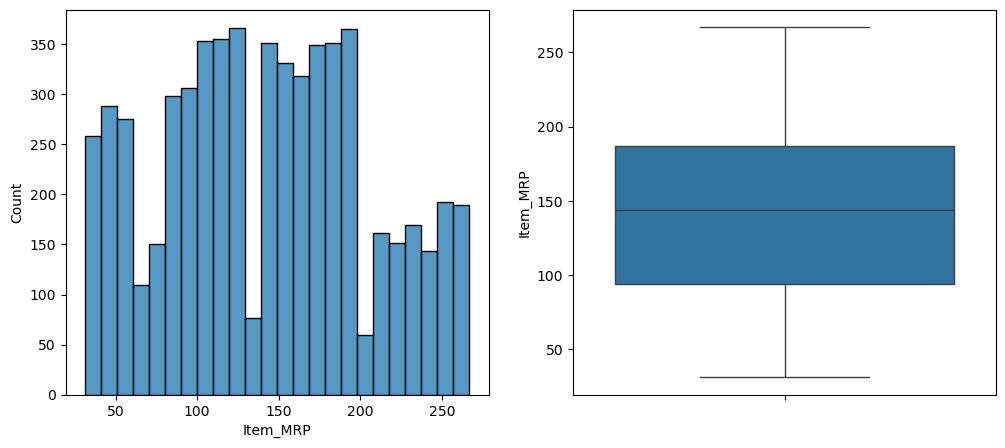

In [ ]:
visualize_numeric_features(x_train_c,'Item_MRP')

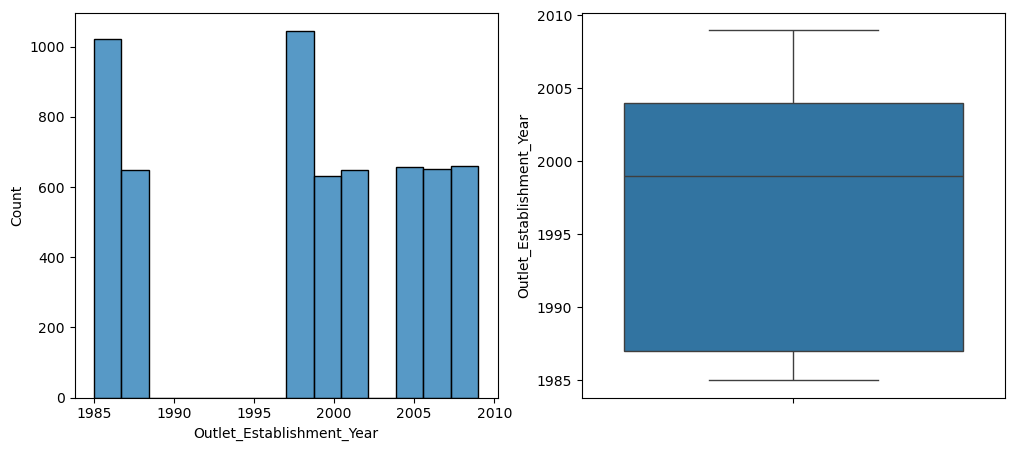

In [ ]:
visualize_numeric_features(x_train_c,'Outlet_Establishment_Year')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

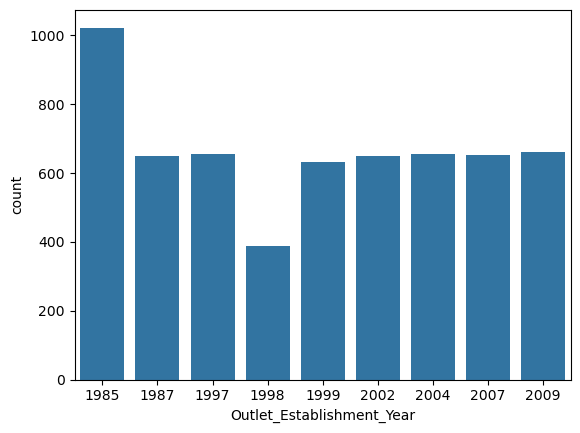

In [ ]:
sns.countplot(data=x_train_c, x='Outlet_Establishment_Year')

<h2>Categorical Features</h2>

In [ ]:
cat_features = x_train_c.select_dtypes(include=['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non_Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,5966,5966,5966
unique,1543,3,3,10,3,3,4
top,NCI54,Low_Fat,Food,OUT027,Small,Tier 3,Supermarket Type1
freq,9,2723,4269,668,3357,2367,3893


In [ ]:
cat_features.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [ ]:
cat_features['Item_Identifier'].value_counts()

Item_Identifier
NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: count, Length: 1543, dtype: int64

In [ ]:
cat_features['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat       2723
Regular       2106
Non_Edible    1137
Name: count, dtype: int64

In [ ]:
cat_features['Item_Type'].value_counts()

Item_Type
Food               4269
Non_Consumables    1137
Drink               560
Name: count, dtype: int64

In [ ]:
cat_features['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: count, dtype: int64

In [ ]:
cat_features['Outlet_Size'].value_counts()

Outlet_Size
Small     3357
Medium    1960
High       649
Name: count, dtype: int64

In [ ]:
cat_features['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: count, dtype: int64

In [ ]:
cat_features['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: count, dtype: int64

<h2>Data Wrangling + Feature Engineering</h2>

<h3>Step 1: Create High level Item Types</h3>

In [ ]:
x_train_c['Item_Identifier'].apply(lambda x: x[:2])

1921    FD
655     NC
2229    FD
2537    FD
3528    FD
        ..
5734    FD
5191    FD
5390    NC
860     FD
7270    NC
Name: Item_Identifier, Length: 5966, dtype: object

In [ ]:
x_train_c['Item_Identifier'].apply(lambda x: x[:2]).value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [ ]:
#Step 1: Map Item Ids to Item Types
def create_item_type(data_frame):
    data_frame['Item_Type'] = data_frame['Item_Identifier'].str[:2]
    data_frame['Item_Type'] = data_frame['Item_Type'].map({
                       'FD':'Food',
                       'NC':'Non_Consumables',
                       'DR':'Drink'
    })
    return data_frame
     

In [ ]:
x_train_c = create_item_type(x_train_c)
x_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,Small,Tier 3,Grocery Store
655,NCJ42,19.75,Non_Edible,0.014301,Non_Consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,8.60,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low_Fat,0.118342,Food,222.6088,OUT045,2002,Small,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


<h2>Step 2: Fill the missing values for item_Weight</h2>

In [ ]:
x_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
x_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.600
4900,DRA24,19.350
1876,DRA59,8.270
3571,DRB01,7.390
1431,DRB13,6.115
...,...,...
1224,NCZ30,6.590
6744,NCZ41,19.850
411,NCZ42,10.500
6879,NCZ53,9.600


In [ ]:
x_train_c[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
4141,Drink,7.970
6811,Drink,11.800
305,Drink,15.750
6759,Drink,7.270
5606,Drink,8.210
...,...,...
6715,Non_Consumables,16.600
3611,Non_Consumables,8.510
7447,Non_Consumables,18.350
7061,Non_Consumables,9.195


In [ ]:
x_train_c.pivot_table(values= 'Item_Weight',index='Item_Identifier').reset_index()

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1538,NCZ30,6.590
1539,NCZ41,19.850
1540,NCZ42,10.500
1541,NCZ53,9.600


In [ ]:
#Step 2: Fill in missing values for Item_Weight
#Logic
#1st step: Use mapping of item ID - weight and fill in missing values 
#2nd step : If completely new item 
#i.e item ID not in test \ live data use item type - median(weight) and fill in missing values

ITEM_ID_WEIGHT_PIVOT = x_train_c.pivot_table(values= 'Item_Weight', index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.3),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [ ]:
ITEM_TYPE_WEIGHT_PIVOT = x_train_c.pivot_table(values='Item_Weight',index='Item_Type',
                                        aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'],ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()

dict_items([('Drink', 11.8), ('Food', 12.8), ('Non_Consumables', 13.1)])

In [ ]:
def input_item_weight(data_frame):
    #1st logic itemid - weight
    data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
    #2nd logic item type - weight if any still missing
    data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(ITEM_ID_WEIGHT_MAPPING))
    
    return data_frame

In [ ]:
x_train_c = input_item_weight(x_train_c)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
x_train['Item_Weight'] = imputer.fit_transform(x_train[['Item_Weight']])


In [ ]:
x_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<h3>Fill in missing values for Outlet_Size</h3>

In [ ]:
x_train_c.groupby(by=['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           744
Supermarket Type1  High            649
                   Medium          631
                   Small          2613
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [ ]:
x_train_c.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type',
    aggfunc=lambda x: x.mode()[0]
).reset_index()


,Outlet_Type,Outlet_Size
0,Grocery Store,Small
1,Supermarket Type1,Small
2,Supermarket Type2,Medium
3,Supermarket Type3,Medium


In [ ]:
#step 3: Impute missing values for Outlet_Size
#Logic:
#1st step: Use mapping of Outlet_Type - mode (Outlet_Size) and fill in missing values 

from scipy.stats import mode

OUTLET_TYPE_SIZE_PIVOT = x_train_c.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type',
    aggfunc=lambda x: x.mode()[0]
).reset_index()

OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'],OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
OUTLET_TYPE_SIZE_MAPPING.items()

dict_items([('Grocery Store', 'Small'), ('Supermarket Type1', 'Small'), ('Supermarket Type2', 'Medium'), ('Supermarket Type3', 'Medium')])

In [ ]:
def impute_outlet_size(data_frame):
    #1st logic Outlet_Type - mode(Outlet_Size)
    data_frame.loc[:,'Outlet_Size'] = data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))
    return data_frame

In [ ]:
x_train_c = impute_outlet_size(x_train_c)

In [ ]:
x_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<h3>Step 4: Standardize item_Fat_Content categories</h3>

In [ ]:
x_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat       2723
Regular       2106
Non_Edible    1137
Name: count, dtype: int64

In [ ]:
def standardize_item_fat_content(data_frame):
    data_frame['Item_Fat_Content']=data_frame['Item_Fat_Content'].replace(
        {
            'Low Fat': 'Low_Fat',
            'LF': 'Low_Fat',
            'reg': 'Regular',
            'low fat' : 'Low_Fat'
        }
    )
    return data_frame

In [ ]:
x_train_c = standardize_item_fat_content(x_train_c)
x_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat       2723
Regular       2106
Non_Edible    1137
Name: count, dtype: int64

<h3>Step 5: Correct Item fat content for non-consumables</h3>

In [ ]:
x_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Non_Edible          1137
dtype: int64

In [ ]:
x_train_c.loc[x_train_c['Item_Type'] == 'Non_Consumables','Item_Fat_Content']


655     Non_Edible
4423    Non_Edible
907     Non_Edible
7021    Non_Edible
6074    Non_Edible
           ...    
8322    Non_Edible
466     Non_Edible
6265    Non_Edible
5390    Non_Edible
7270    Non_Edible
Name: Item_Fat_Content, Length: 1137, dtype: object

In [ ]:
#step 5: Correct Item fat content for non-consumables

def correct_item_fat_content(data_frame):
    data_frame.loc[data_frame['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content'] = 'Non_Edible'
    return data_frame

In [ ]:
x_train_c = correct_item_fat_content(x_train_c)
x_train_c.groupby(by = ['Item_Type','Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Non_Edible          1137
dtype: int64

In [ ]:
x_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


<h1>Prepare Datasets for ML</h1>

In [ ]:
def prepare_dataset(data_frame):
    #step 1: Create Item Type
    data_frame = create_item_type(data_frame)
    #step 2: Fill in missing values for Item_Weight
    data_frame = input_item_weight(data_frame)
    #step 3: Impute missing values for Outlet_size
    data_frame = impute_outlet_size(data_frame)
    #step 4: Make Item Fat Content categories consistent
    data_frame = standardize_item_fat_content(data_frame)
    #step 5: Correct Item Fat Content for non-consumables
    data_frame = correct_item_fat_content(data_frame)
    return data_frame

     

In [ ]:
x_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
x_train = prepare_dataset(x_train)
x_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
x_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
x_test = prepare_dataset(x_test)
x_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<h1>Handling Categorical Data</h1>
<h2>Expt 1: All categorical columns - one hot encoded</h2>

In [ ]:
cat_feats = x_train.select_dtypes(include=['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non_Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
ohe_feature_names = ohe.get_feature_names_out(input_features = cat_feats.columns)
ohe_feature_names 

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [ ]:
num_feats_train = x_train.select_dtypes(exclude = ['object']).reset_index(drop = True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [ ]:
cat_feats_train = x_train.select_dtypes(include=['object'])
x_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns = ohe_feature_names)
x_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
x_train_final = pd.concat([num_feats_train,x_train_cat_ohe],axis=1)
x_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
final_columns = x_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [ ]:
num_feats_test = x_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = x_test.select_dtypes(include=['object'])
x_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)
x_test_final = pd.concat([num_feats_test, x_test_cat_ohe], axis=1)
x_test_final = x_test_final[final_columns]

x_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


<h1>Modeling</h1>

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

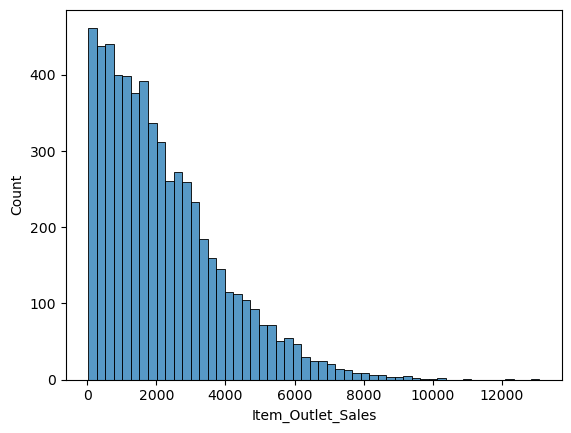

In [ ]:
sns.histplot(y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor 
from sklearn.model_selection import cross_validate
import numpy as np

In [ ]:
def train_and_eval_model(model, x_train, y_train, cv=5):
    cv_results = cross_validate(
        model,
        x_train,
        y_train,
        cv=cv,
        scoring=('r2', 'neg_root_mean_squared_error'),
        return_train_score=False
    )

    print('Model:', model)

    # R2
    r2_scores = cv_results['test_r2']
    print('R2 CV scores:', r2_scores)
    print('R2 CV scores mean / stdev:', np.mean(r2_scores), '/', np.std(r2_scores))

    # RMSE (convert negative RMSE to positive)
    rmse_scores = cv_results['test_neg_root_mean_squared_error']
    rmse_scores = [-1 * score for score in rmse_scores]
    print('RMSE CV scores:', rmse_scores)
    print('RMSE CV scores mean / stdev:', np.mean(rmse_scores), '/', np.std(rmse_scores))


In [ ]:
rf = RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf, x_train=x_train_final, y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.56973495 0.52795277 0.54453348 0.55426731 0.51851608]
R2 CV scores mean / stdev: 0.5430009182799748 / 0.018275354292363745
RMSE CV scores: [1105.1880575918183, 1167.066895617613, 1178.3783181121928, 1154.369560798569, 1204.1627329446562]
RMSE CV scores mean / stdev: 1161.83311301297 / 32.733163400476464


In [ ]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, x_train=x_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60665214 0.59344478 0.57355972 0.60946825 0.55004021]
R2 CV scores mean / stdev: 0.5866330201420065 / 0.02226458359292369
RMSE CV scores: [1056.7117601326954, 1083.0856317048438, 1140.2120518210384, 1080.5274283185977, 1164.0754824341268]
RMSE CV scores mean / stdev: 1104.9224708822605 / 40.350146409675624


In [ ]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,x_train=x_train_final,y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58794356 0.54581537 0.54522776 0.58506205 0.54004241]
R2 CV scores mean / stdev: 0.5608182325738321 / 0.02108710243141811
RMSE CV scores: [1081.5497482289254, 1144.7726299481271, 1177.479856409211, 1113.7794509293972, 1176.9369094263825]
RMSE CV scores mean / stdev: 1138.9037189884086 / 37.12086441998255


In [ ]:
xgr = xgb.XGBRegressor(objective = 'reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr, x_train=x_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
R2 CV scores: [0.57730972 0.55914207 0.54421372 0.58393553 0.52431207]
R2 CV scores mean / stdev: 0.5577826221000934 / 0.021778536649818565
RMSE CV scores: [1095.416494682338, 1127.8526118741622, 1178.791893218632, 1115.290340217991, 1196.8930

In [ ]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, x_train=x_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

<h1>Handling Categorical Data</h1>
<h2>Expt 2: All categorical columns - Native Handling</h2>

In [ ]:
x_train_copy = x_train.copy().drop(columns='Item_Identifier')
cat_cols = x_train_copy.select_dtypes(include = ['object']).columns.tolist()
num_cols = cal_cols = x_train_copy.select_dtypes(exclude=['object']).columns.tolist()

cat_cols, num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [ ]:
x_train_copy[cat_cols] = x_train_copy[cat_cols].astype('category')
n_categorical_features = len(cat_cols)
n_numerical_features = len(num_cols)
x_train_copy = x_train_copy[cat_cols+num_cols]

x_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                5966 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.1 KB


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

hgb = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
        random_state=42, categorical_features=categorical_mask
    ),
)

train_and_eval_model(model=hgb, x_train=x_train_copy, y_train=y_train)

Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017F3FB50350>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                     

In [ ]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,x_train=x_train_copy, y_train=y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 10
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 10
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train se

<h1>Handling Categorical Data</h1>
<h3>Expt 3: No Item Identifier - one hot encoded</h3>

In [ ]:
x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier']).head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,Non_Edible,Non_Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
cat_feats = x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

In [ ]:
num_feats_train = x_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train = x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
x_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
x_train_final = pd.concat([num_feats_train, x_train_cat_ohe], axis=1)
x_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non_Consumables,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, x_train=x_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60292023 0.58504052 0.57733175 0.61745834 0.56387403]
R2 CV scores mean / stdev: 0.5893249748778905 / 0.018901122544334716
RMSE CV scores: [1061.7127369860802, 1094.2230725305408, 1135.1580306171122, 1069.4167720713822, 1146.041290990462]
RMSE CV scores mean / stdev: 1101.3103806391152 / 34.00565640143885


In [ ]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,x_train=x_train_final,y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58794356 0.54581537 0.54522776 0.58506205 0.54004241]
R2 CV scores mean / stdev: 0.5608182325738321 / 0.02108710243141811
RMSE CV scores: [1081.5497482289254, 1144.7726299481271, 1177.479856409211, 1113.7794509293972, 1176.9369094263825]
RMSE CV scores mean / stdev: 1138.9037189884086 / 37.12086441998255


In [ ]:
xgr = xgb.XGBRegressor(objective = 'reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr, x_train=x_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
R2 CV scores: [0.50683547 0.4896938  0.46169509 0.50251043 0.45847631]
R2 CV scores mean / stdev: 0.4838422182734098 / 0.02022551682881816
RMSE CV scores: [1183.2160803033732, 1213.4403876873191, 1281.0635870588308, 1219.5500118079262, 1277.03

In [ ]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, x_train=x_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

<h2>Handling Categorical Data</h2>
<h3>Expt 4: Item Identifier - Feature hashed, rest categorical - one hot encoded</h3>

In [ ]:
x_train['Item_Identifier'].head()

1921    FDN08
655     NCJ42
2229    FDY47
2537    FDN45
3528    FDY16
Name: Item_Identifier, dtype: object

In [ ]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

hash_vector_size = 50
fh = FeatureHasher(n_features=hash_vector_size, input_type='string')

# Wrap each item in a list to make it an iterable of strings
hashed_array = fh.transform([[item] for item in x_train['Item_Identifier']]).toarray()

hashed_df = pd.DataFrame(hashed_array, columns=['H'+str(i) for i in range(hash_vector_size)])
hashed_df.head()


,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cat_feats = x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

In [ ]:
num_feats_train = x_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train = x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
x_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
x_train_final = pd.concat([num_feats_train, hashed_df, x_train_cat_ohe], axis=1)

x_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
x_train_final.shape

(5966, 80)

In [ ]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, x_train=x_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60319703 0.58552563 0.57113502 0.61696305 0.54792501]
R2 CV scores mean / stdev: 0.5849491473704221 / 0.024165362822720603
RMSE CV scores: [1061.3426219967716, 1093.5832814290593, 1143.4490248966201, 1070.1088646346977, 1166.8083476041259]
RMSE CV scores mean / stdev: 1107.0584281122551 / 41.30644783011832


In [ ]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,x_train=x_train_final,y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.5830382  0.54753561 0.54490231 0.5914705  0.53890611]
R2 CV scores mean / stdev: 0.5611705462834925 / 0.02164510719498439
RMSE CV scores: [1087.9683979747765, 1142.6026376820207, 1177.9011066189566, 1105.1451907433564, 1178.3897976532232]
RMSE CV scores mean / stdev: 1138.4014261344669 / 36.94972886317636


In [ ]:
xgr = xgb.XGBRegressor(objective = 'reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr, x_train=x_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
R2 CV scores: [0.5280641  0.49257107 0.47779502 0.5258751  0.45241852]
R2 CV scores mean / stdev: 0.49534476387931886 / 0.028847898108362927
RMSE CV scores: [1157.4697608486103, 1210.014662783831, 1261.7607670121313, 1190.5674486924656, 1284.1

In [ ]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, x_train=x_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 80
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 80
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

In [ ]:
x_test.shape

(2557, 11)

In [ ]:
hashed_test_df = pd.DataFrame(
    fh.transform([[item] for item in x_test['Item_Identifier']]).toarray(),
    columns=['H' + str(i) for i in range(hash_vector_size)]
)

num_feats_test = x_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = x_test.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])

x_test_cat_ohe = pd.DataFrame(
    ohe.transform(cat_feats_test).toarray(),
    columns=ohe_feature_names
)

x_test_final = pd.concat([num_feats_test, hashed_test_df, x_test_cat_ohe], axis=1)
x_test_final.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,-1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
x_test_final.shape

(2557, 80)

In [ ]:
xgr = xgb.XGBRegressor(objective = 'reg:squarederror',random_state=SEED)
xgr.fit(x_train_final,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgr.predict(x_test_final)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
print('R2 Score:', r2_score(y_test,y_pred))
print('RMSE Score:',mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.5451834772428403
RMSE Score: 1128.688680008725


C:\Users\vishw\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


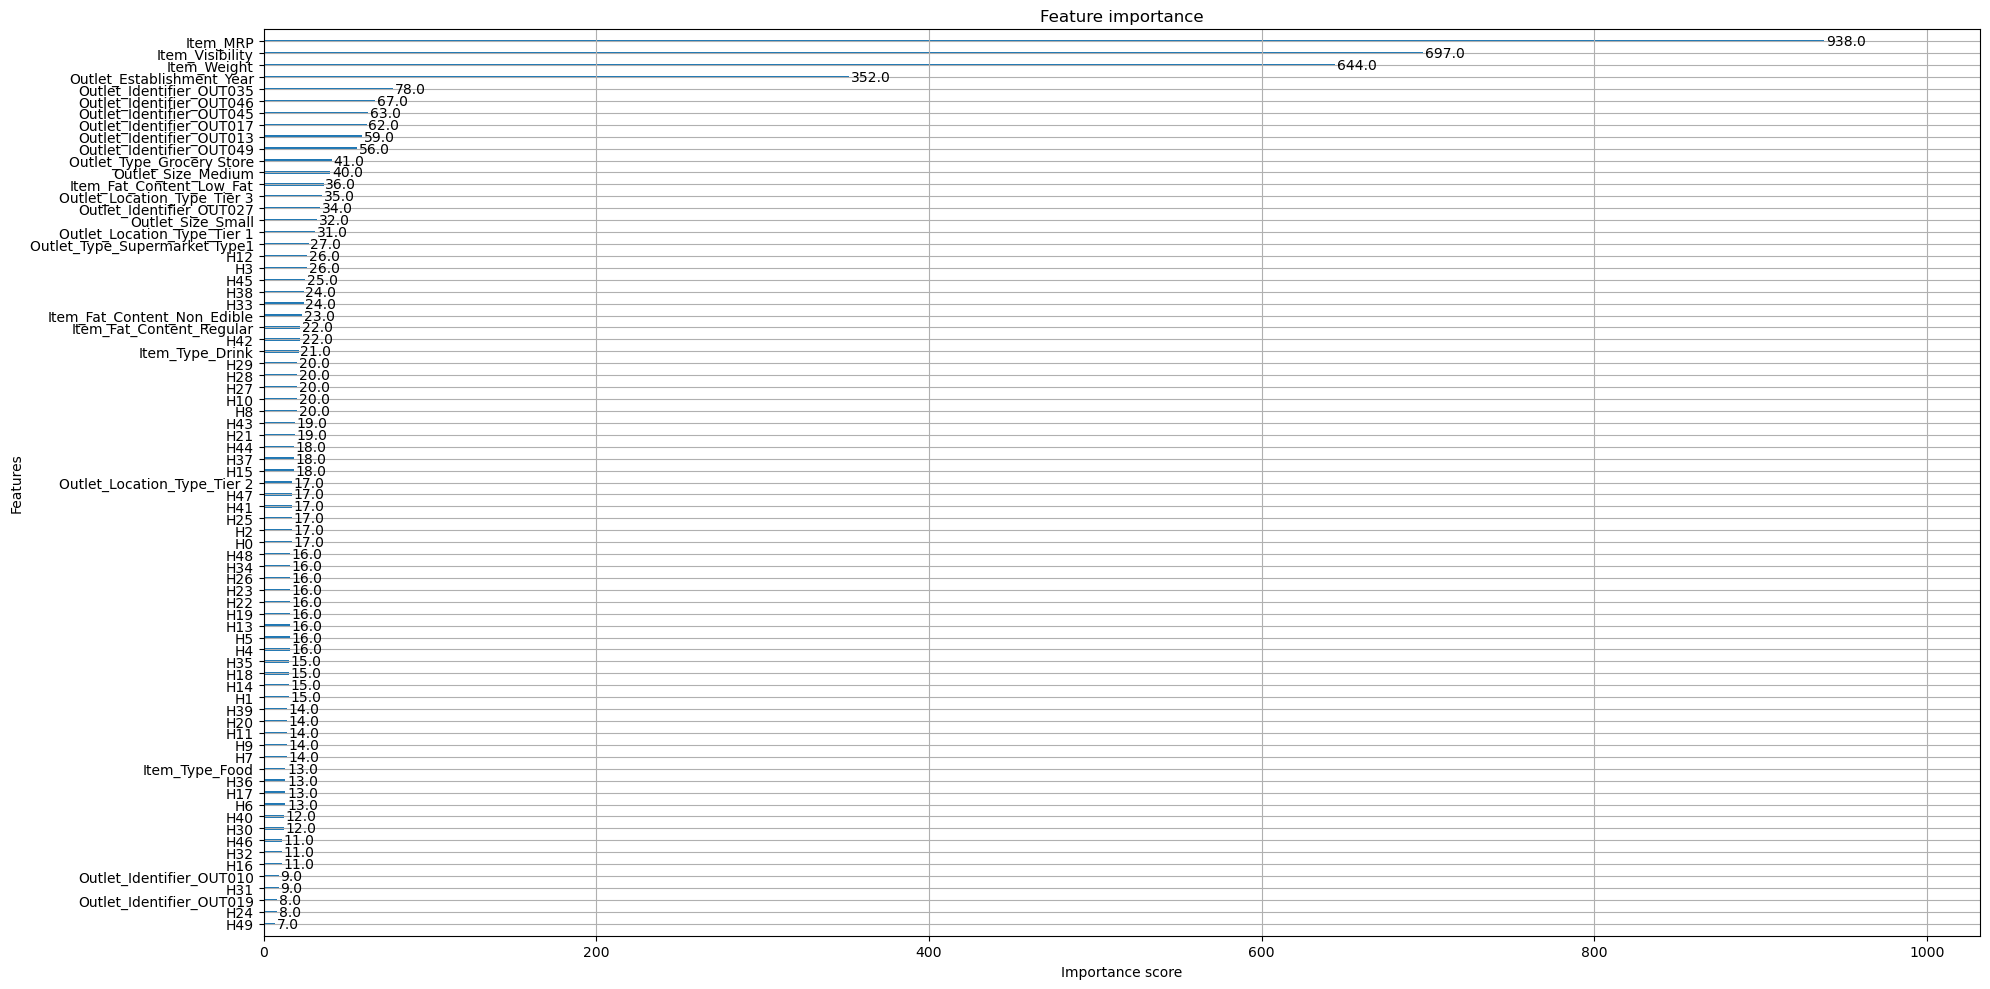

In [ ]:
from xgboost import plot_importance

fig,ax = plt.subplots(1,1, figsize=(20,10))
plot_importance(xgr,ax=ax)
plt.tight_layout()